In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOAD THE DATASET

In [ ]:
dataset_train=pd.read_csv('drive/MyDrive/KDD_Train.csv')

In [ ]:
dataset_test=pd.read_csv('drive/MyDrive/KDD_Test.csv')

SAMPLE VIEW OF THE DATASET

In [ ]:
dataset_train.head()

,duration,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
dataset_test.head()

,duration,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [ ]:
print("Shape of Training Dataset:", dataset_train.shape)
print("Shape of Testing Dataset:", dataset_test.shape)

Shape of Training Dataset: (125973, 42)
Shape of Testing Dataset: (22543, 42)


DATASET INFORMATION

In [ ]:
dataset_train.info()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   src_bytes                    125973 non-null  object 
 4   dst_bytes                    125973 non-null  int64  
 5   flag                         125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

CHECK IF THERE ARE NULL VALUES

In [ ]:
dataset_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
src_bytes                      0
dst_bytes                      0
flag                           0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_count                      0
srv_serror_rate                0
srv_rerror_rate                0
srv_diff_h

In [ ]:
dataset_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
src_bytes                      0
dst_bytes                      0
flag                           0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_count                      0
srv_serror_rate                0
srv_rerror_rate                0
srv_diff_h

CHECK IF THERE ARE DUPLICATED ROWS

In [ ]:
dataset_train.duplicated().sum()

0

In [ ]:
dataset_test.duplicated().sum()

0

In [ ]:
types = dataset_train["label"].unique()
types

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
#label distribution of Training set and testing set
print('Label distribution Training set:')
print(dataset_train['label'].value_counts())
print()
print('Label distribution Test set:')
print(dataset_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9710
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


<Axes: xlabel='count', ylabel='service'>

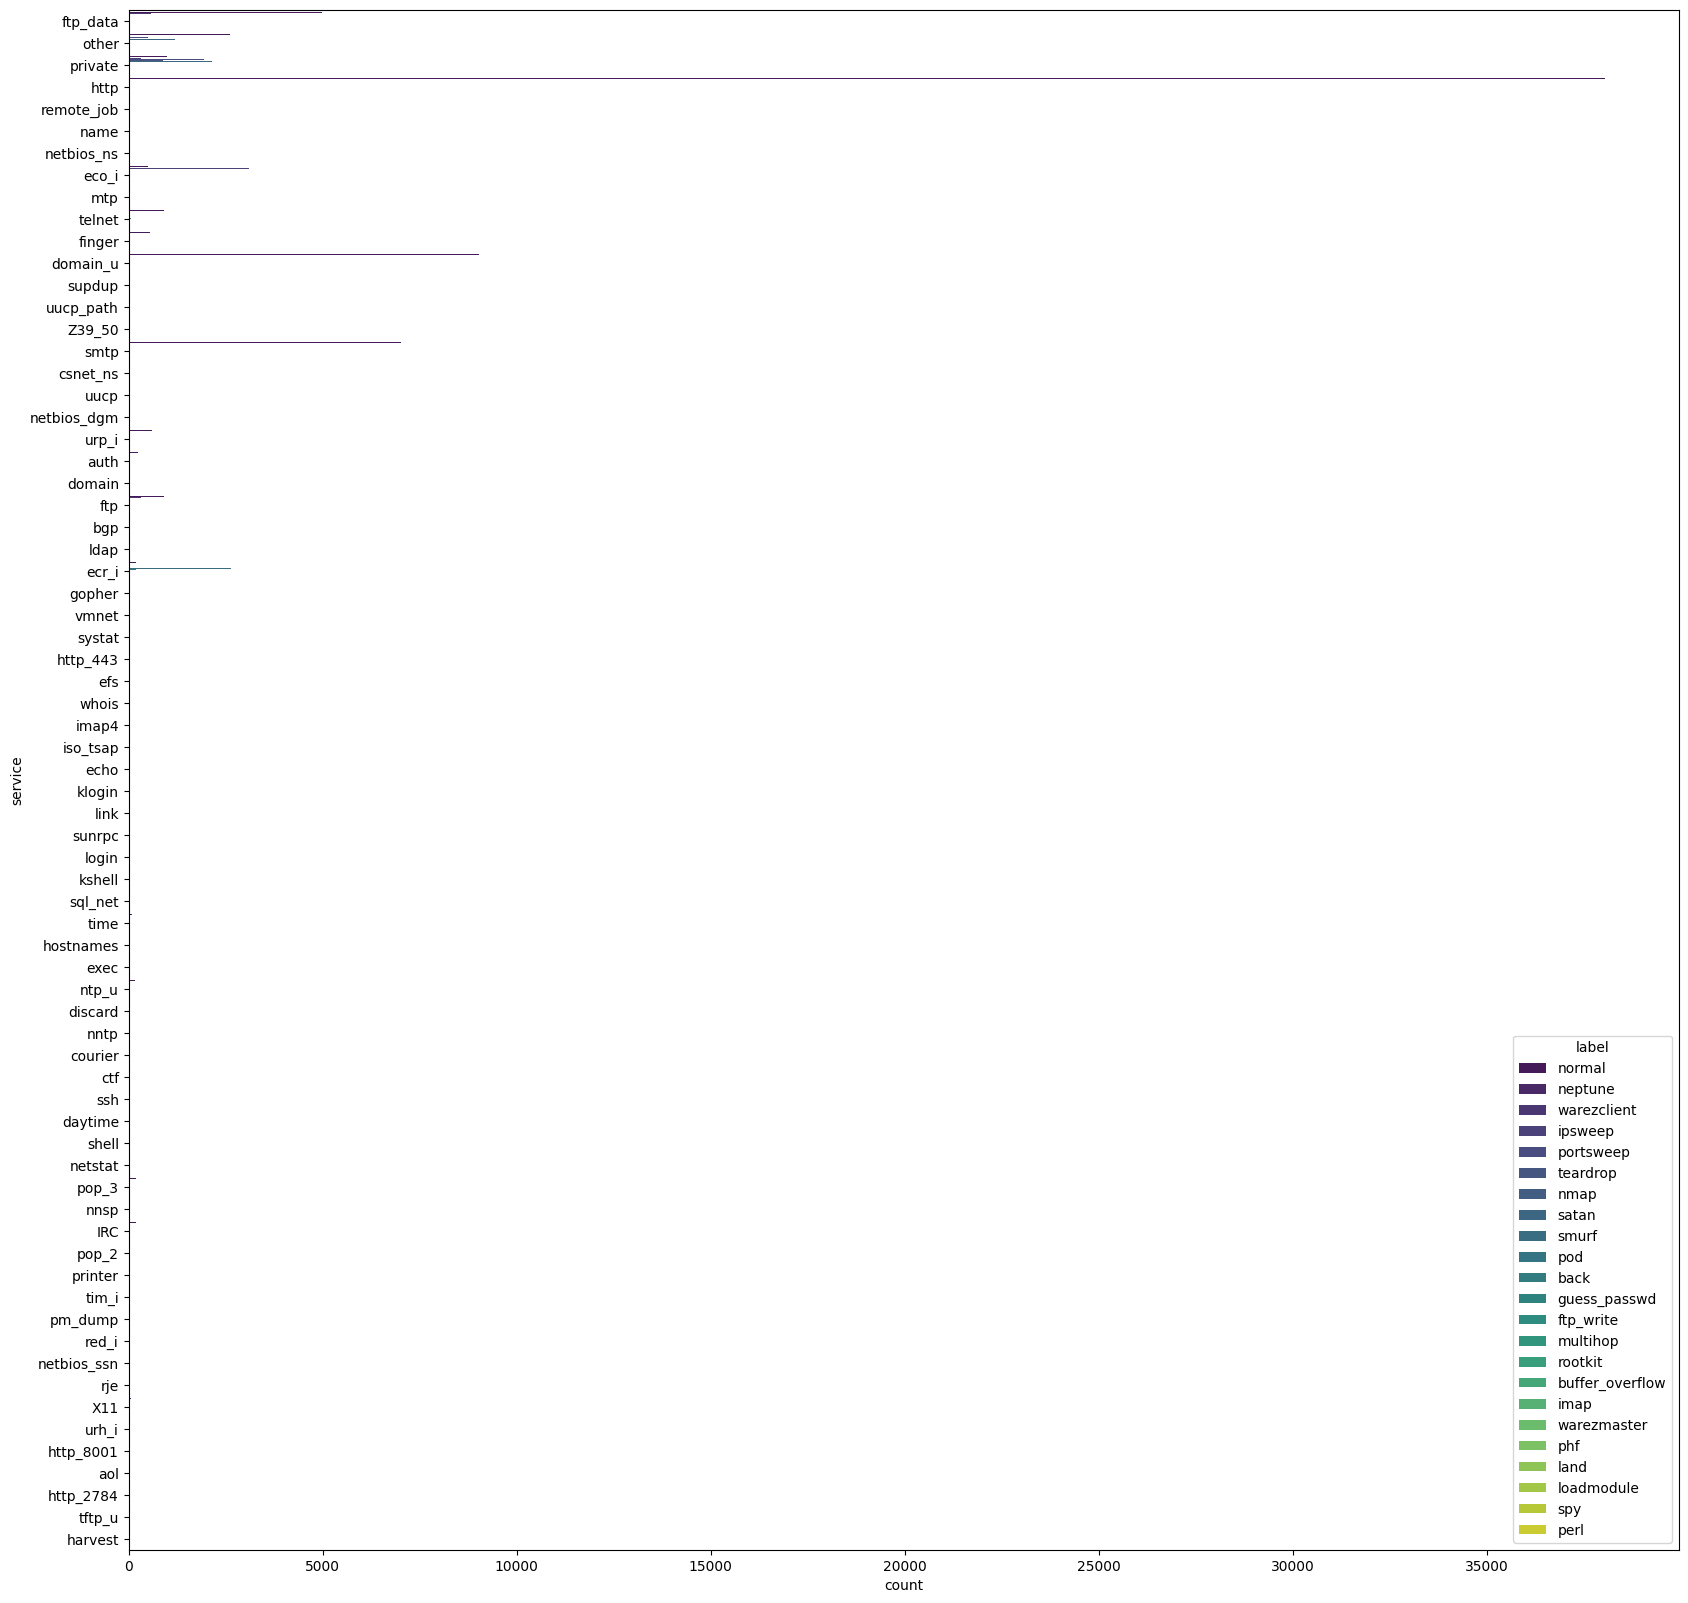

In [ ]:
plt.figure(figsize = (20,20))
sns.countplot(data=dataset_train, y=dataset_train.service, hue = 'label', palette="viridis")

IDENTIFY CATEGORICAL FEATURES

In [ ]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes == 'object' :
        unique_cat = len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'src_bytes' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in dataset_test.columns:
    if dataset_test[col_name].dtypes == 'object' :
        unique_cat = len(dataset_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 63 categories
Feature 'src_bytes' has 11 categories
Feature 'label' has 38 categories


In [ ]:
categorical_columns=['protocol_type', 'service', 'src_bytes']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'src_bytes']
 # Get the categorical values into a 2D numpy array
dataset_train_categorical_values = dataset_train[categorical_columns]
dataset_test_categorical_values = dataset_test[categorical_columns]

In [ ]:
dataset_train_categorical_values.head()

,protocol_type,service,src_bytes
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# protocol type
unique_protocol=sorted(dataset_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(dataset_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# src_bytes
unique_src_bytes=sorted(dataset_train.src_bytes.unique())
string3 = 'src_bytes_'
unique_src_bytes2=[string3 + x for x in unique_src_bytes]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_src_bytes2
print(dumcols)

#do same for test set
unique_service_test=sorted(dataset_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_src_bytes2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

LABEL ENCODING

In [ ]:
#Transform categorical features into numbers using LabelEncoder()
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())
# test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  src_bytes
0              1       20          9
1              2       44          9
2              1       49          5
3              1       24          9
4              1       24          9


ONE HOT ENCODING

In [ ]:
#One-Hot-Encoding
enc = OneHotEncoder()
dataset_train_categorical_values_encenc = enc.fit_transform(dataset_train_categorical_values_enc)
dataset_train_cat_data = pd.DataFrame(dataset_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
dataset_test_categorical_values_encenc = enc.fit_transform(dataset_test_categorical_values_enc)
dataset_test_cat_data = pd.DataFrame(dataset_test_categorical_values_encenc.toarray(),columns=testdumcols)

ADD 6 MISSING CATEGORIES FROM TRAIN SET TO TEST SET

In [ ]:
trainservice=dataset_train['service'].tolist()
testservice= dataset_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_harvest',
 'service_tftp_u',
 'service_red_i',
 'service_urh_i',
 'service_http_2784',
 'service_aol',
 'service_http_8001']

In [ ]:
for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape

(22543, 84)

JOIN ENCODED CATEGORICAL DATAFRAME WITH THE NON-CATEGORICAL DATAFRAME

In [ ]:
 #Join encoded categorical dataframe with the non-categorical dataframe
newdf=dataset_train.join(dataset_train_cat_data)
newdf.drop('src_bytes', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=dataset_test.join(dataset_test_cat_data)
newdf_test.drop('src_bytes', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22543, 123)


Split Dataset into 4 datasets for every attack category Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R. Replace labels column with new labels column

MAKE NEW DATASETS

In [ ]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17170, 123)
Dimensions of Probe: (12131, 123)
Dimensions of R2L: (12595, 123)
Dimensions of U2R: (9777, 123)


FEATURE SCALING

In [ ]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label

<ipython-input-325-c950fdcb5610>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS = DoS_df.drop('label',1)
<ipython-input-325-c950fdcb5610>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe = Probe_df.drop('label',1)
<ipython-input-325-c950fdcb5610>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L = R2L_df.drop('label',1)
<ipython-input-325-c950fdcb5610>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R = U2R_df.drop('label',1)
<ipython-input-325-c950fdcb5610>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS_test = DoS_df_t

Save a list of feature names for later use (it is the same for every attack category). Column names are dropped at this stage.

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

Use StandardScaler() to scale the dataframes

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

Check that the Standard Deviation is 1

In [ ]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

Feature Selection:

Univariate Feature Selection using ANOVA F-test

In [ ]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 16  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(113270, 13)

Get the features that were selected: DoS

In [ ]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'rerror_rate',
 'same_srv_rate',
 'srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'src_bytes_S0',
 'src_bytes_SF']

In [ ]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78999, 13)

Get the features that were selected: Probe

In [ ]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'diff_srv_rate',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'src_bytes_SF']

In [ ]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68338, 13)

Get the features that were selected: R2L

In [ ]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['dst_bytes',
 'flag',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'src_bytes_RSTO']

In [ ]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  86  87  89
  92  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67395, 13)

Get the features that were selected: U2R

In [ ]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_http',
 'service_telnet']

Summary of features selected by Univariate Feature Selection

In [ ]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'rerror_rate', 'same_srv_rate', 'srv_serror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'src_bytes_S0', 'src_bytes_SF']

Features selected for Probe: ['logged_in', 'diff_srv_rate', 'srv_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'src_bytes_SF']

Features selected for R2L: ['dst_bytes', 'flag', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'src_bytes_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',

 **NAIVE BAYES ALGORITHM**

Recursive Feature Elimination for feature ranking (Option 1: get importance from previous selected)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
clf2 =GaussianNB()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf2, n_features_to_select=13)
rfe.fit(X_newDoS, Y_DoS.astype('int'))
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'count'), (1, 'dst_host_count'), (1, 'dst_host_same_srv_rate'), (1, 'dst_host_serror_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_serror_rate'), (1, 'logged_in'), (1, 'rerror_rate'), (1, 'same_srv_rate'), (1, 'service_http'), (1, 'src_bytes_S0'), (1, 'src_bytes_SF'), (1, 'srv_serror_rate')]


In [ ]:
rfe.fit(X_newProbe, Y_Probe.astype(int))
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'Protocol_type_icmp'), (1, 'diff_srv_rate'), (1, 'dst_host_diff_srv_rate'), (1, 'dst_host_rerror_rate'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'dst_host_srv_rerror_rate'), (1, 'logged_in'), (1, 'service_eco_i'), (1, 'service_private'), (1, 'src_bytes_SF'), (1, 'srv_count')]


In [ ]:
rfe.fit(X_newR2L, Y_R2L.astype(int))

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'dst_bytes'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'flag'), (1, 'hot'), (1, 'is_guest_login'), (1, 'num_failed_logins'), (1, 'service_ftp'), (1, 'service_ftp_data'), (1, 'service_http'), (1, 'service_imap4'), (1, 'src_bytes_RSTO')]


In [ ]:
rfe.fit(X_newU2R, Y_U2R.astype(int))

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'dst_host_count'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'hot'), (1, 'num_file_creations'), (1, 'num_shells'), (1, 'root_shell'), (1, 'service_ftp_data'), (1, 'service_http'), (1, 'service_telnet'), (1, 'srv_diff_host_rate'), (1, 'urgent')]


In [ ]:
# all features
clf2_DoS=GaussianNB()
clf2_Probe=GaussianNB()
clf2_R2L=GaussianNB()
clf2_U2R=GaussianNB()
clf2_DoS.fit(X_DoS, Y_DoS.astype(int))
clf2_Probe.fit(X_Probe, Y_Probe.astype(int))
clf2_R2L.fit(X_R2L, Y_R2L.astype(int))
clf2_U2R.fit(X_U2R, Y_U2R.astype(int))

GaussianNB()

In [ ]:
clf2_DoS.predict(X_DoS_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf2_DoS.predict_proba(X_DoS_test)[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

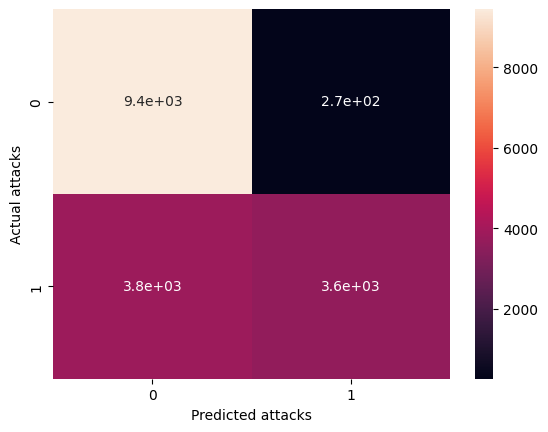

In [ ]:
Y_DoS_pred=clf2_DoS.predict(X_DoS_test)
# Create confusion matrix
cf_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix, annot=True)

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

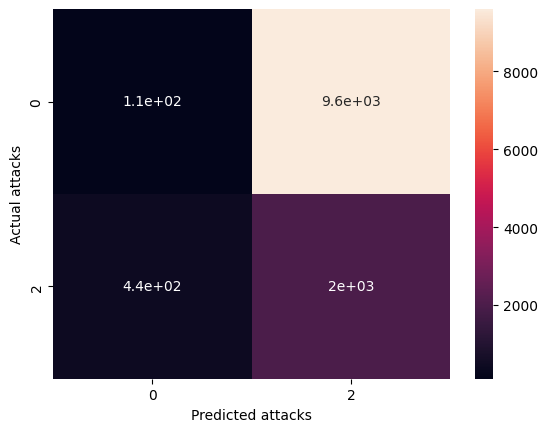

In [ ]:
Y_Probe_pred=clf2_Probe.predict(X_Probe_test)
# Create confusion matrix
cf_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix, annot=True)

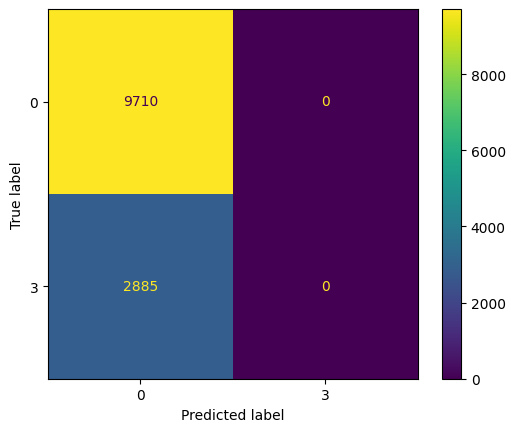

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_R2L_pred=clf2_R2L.predict(X_R2L_test)

confusion_matrix = metrics.confusion_matrix(Y_R2L_test,Y_R2L_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "3"])
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

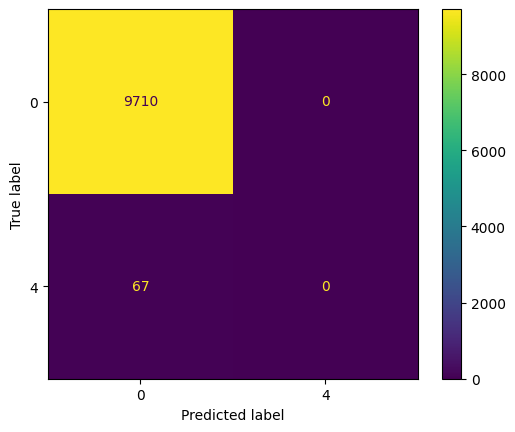

In [ ]:

Y_U2R_pred=clf2_U2R.predict(X_U2R_test)
# Create confusion matrix
Y_U2R_pred=clf2_R2L.predict(X_U2R_test)

confusion_matrix = metrics.confusion_matrix(Y_U2R_test,Y_U2R_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "4"])
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


In [ ]:
DoS_Accuracy = []
U2R_Accuracy = []
R2L_Accuracy = []
Probe_Accuracy = []

DoS_Precision = []
U2R_Precision = []
R2L_Precision = []
Probe_Precision = []

DoS_Recall = []
U2R_Recall = []
R2L_Recall = []
Probe_Recall = []

DoS_Fmeasure = []
U2R_Fmeasure = []
R2L_Fmeasure = []
Probe_Fmeasure = []

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf2_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
DoS_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf2_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
DoS_Precision.append(precision.mean())
recall = cross_val_score(clf2_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
DoS_Recall.append(recall.mean())
f = cross_val_score(clf2_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
DoS_Fmeasure.append(f.mean())

Accuracy: 0.86651 (+/- 0.01616)
Precision: 0.98835 (+/- 0.01093)
Recall: 0.70107 (+/- 0.03896)
F-measure: 0.82011 (+/- 0.02587)


In [ ]:
print(DoS_Accuracy,DoS_Precision,DoS_Recall,DoS_Fmeasure)

[0.8665113570180548] [0.9883504731752047] [0.7010723860589814] [0.820112798189934]


In [ ]:
accuracy = cross_val_score(clf2_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
Probe_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf2_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
Probe_Precision.append(precision.mean())
recall = cross_val_score(clf2_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
Probe_Recall.append(recall.mean())
f = cross_val_score(clf2_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
Probe_Fmeasure.append(f.mean())

Accuracy: 0.97758 (+/- 0.01093)
Precision: 0.97362 (+/- 0.00800)
Recall: 0.95561 (+/- 0.02944)
F-measure: 0.96412 (+/- 0.01849)


In [ ]:
print(Probe_Accuracy,Probe_Precision,Probe_Recall,Probe_Fmeasure)

[0.9775780907277148] [0.9736193372845667] [0.9556076460527771] [0.9641205682578775]


In [ ]:
accuracy = cross_val_score(clf2_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
R2L_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf2_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
R2L_Precision.append(precision.mean())
recall = cross_val_score(clf2_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
R2L_Recall.append(recall.mean())
f = cross_val_score(clf2_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
R2L_Fmeasure.append(f.mean())

Accuracy: 0.93609 (+/- 0.00974)
Precision: 0.89163 (+/- 0.01331)
Recall: 0.95526 (+/- 0.00759)
F-measure: 0.91675 (+/- 0.01169)


In [ ]:
print(R2L_Accuracy,R2L_Precision,R2L_Recall,R2L_Fmeasure)

[0.9360858958356971] [0.8916307387927846] [0.9552615211817447] [0.9167483721444956]


In [ ]:
accuracy = cross_val_score(clf2_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
U2R_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf2_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
U2R_Precision.append(precision.mean())
recall = cross_val_score(clf2_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
U2R_Recall.append(recall.mean())
f = cross_val_score(clf2_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
U2R_Fmeasure.append(f.mean())

Accuracy: 0.97259 (+/- 0.01122)
Precision: 0.60132 (+/- 0.02891)
Recall: 0.97911 (+/- 0.04265)
F-measure: 0.66067 (+/- 0.04235)


In [ ]:
print(U2R_Accuracy,U2R_Precision,U2R_Recall,U2R_Fmeasure)

[0.9725904389925338] [0.6013206166677997] [0.9791084301897897] [0.6606711255015252]


**RANDOM FOREST ALGORITHM**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
clf1 = RandomForestClassifier(n_jobs=2, random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf1, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS.astype('int'))
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'srv_serror_rate'), (2, 'dst_host_srv_serror_rate'), (3, 'src_bytes_SF'), (4, 'count'), (5, 'dst_host_serror_rate'), (6, 'src_bytes_S0'), (7, 'rerror_rate'), (8, 'dst_host_same_srv_rate'), (9, 'dst_host_srv_count'), (10, 'same_srv_rate'), (11, 'dst_host_count'), (12, 'logged_in'), (13, 'service_http')]


In [ ]:
rfe.fit(X_newProbe, Y_Probe.astype(int))
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'dst_host_same_src_port_rate'), (2, 'dst_host_diff_srv_rate'), (3, 'service_private'), (4, 'dst_host_srv_diff_host_rate'), (5, 'dst_host_srv_rerror_rate'), (6, 'dst_host_srv_count'), (7, 'service_eco_i'), (8, 'dst_host_rerror_rate'), (9, 'Protocol_type_icmp'), (10, 'diff_srv_rate'), (11, 'logged_in'), (12, 'src_bytes_SF'), (13, 'srv_count')]


In [ ]:
rfe.fit(X_newR2L, Y_R2L.astype(int))

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'dst_bytes'), (2, 'hot'), (3, 'flag'), (4, 'dst_host_same_src_port_rate'), (5, 'service_ftp_data'), (6, 'dst_host_srv_diff_host_rate'), (7, 'dst_host_srv_count'), (8, 'is_guest_login'), (9, 'service_ftp'), (10, 'num_failed_logins'), (11, 'service_http'), (12, 'src_bytes_RSTO'), (13, 'service_imap4')]


In [ ]:
rfe.fit(X_newU2R, Y_U2R.astype(int))

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'hot'), (2, 'dst_host_srv_count'), (3, 'dst_host_count'), (4, 'num_file_creations'), (5, 'root_shell'), (6, 'dst_host_same_src_port_rate'), (7, 'dst_host_srv_diff_host_rate'), (8, 'service_ftp_data'), (9, 'num_shells'), (10, 'service_telnet'), (11, 'urgent'), (12, 'service_http'), (13, 'srv_diff_host_rate')]


In [ ]:
from sklearn.feature_selection import RFE
clf1 = RandomForestClassifier(n_jobs=2, random_state=0)
rfe = RFE(estimator=clf1, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [ ]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [ ]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [ ]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['dst_bytes', 'flag', 'wrong_fragment', 'count', 'serror_rate', 'rerror_rate', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'src_bytes_S0', 'src_bytes_SF']

Features selected for Probe: ['dst_bytes', 'flag', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_tcp', 'service_eco_i', 'service_private']

Features selected for R2L: ['duration', 'dst_bytes', 'flag', 'hot', 'logged_in', 'is_guest_login', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data']

Features selected for U2R: ['duration', 'dst_bytes', 'flag', 'hot', 'num_compromised', 'root_shell', 'num_file_creations', 'count', 'dst_host_count', 'dst_host_srv_c

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


In [ ]:
# all features
clf1_DoS=RandomForestClassifier(random_state=0)
clf1_Probe=RandomForestClassifier(random_state=0)
clf1_R2L=RandomForestClassifier(random_state=0)
clf1_U2R=RandomForestClassifier(random_state=0)
clf1_DoS.fit(X_DoS, Y_DoS.astype(int))
clf1_Probe.fit(X_Probe, Y_Probe.astype(int))
clf1_R2L.fit(X_R2L, Y_R2L.astype(int))
clf1_U2R.fit(X_U2R, Y_U2R.astype(int))

RandomForestClassifier(random_state=0)

In [ ]:
# selected features
clf1_rfeDoS=RandomForestClassifier(random_state=0)
clf1_rfeProbe=RandomForestClassifier(random_state=0)
clf1_rfeR2L=RandomForestClassifier(random_state=0)
clf1_rfeU2R=RandomForestClassifier(random_state=0)
clf1_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf1_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf1_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf1_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

RandomForestClassifier(random_state=0)

In [ ]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf1_DoS.predict(X_DoS_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf1_DoS.predict_proba(X_DoS_test)[0:10]

array([[0.5 , 0.5 ],
       [0.55, 0.45],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.77, 0.23],
       [0.91, 0.09],
       [0.85, 0.15],
       [0.55, 0.45],
       [0.51, 0.49],
       [0.92, 0.08]])

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

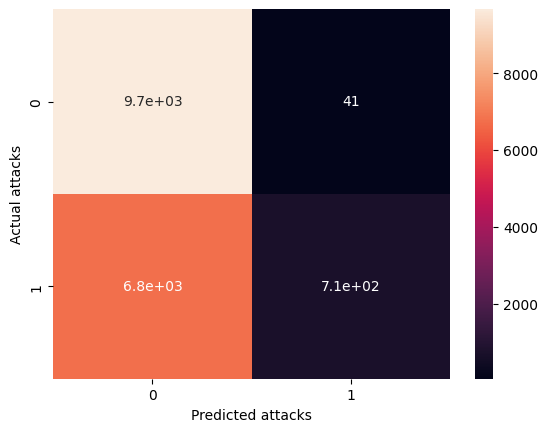

In [ ]:
Y_DoS_pred=clf1_DoS.predict(X_DoS_test)
# Create confusion matrix
cf_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix, annot=True)

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

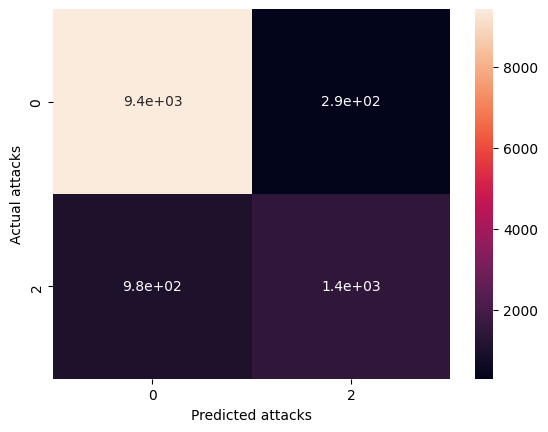

In [ ]:
Y_Probe_pred=clf1_Probe.predict(X_Probe_test)
# Create confusion matrix
cf_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix, annot=True)

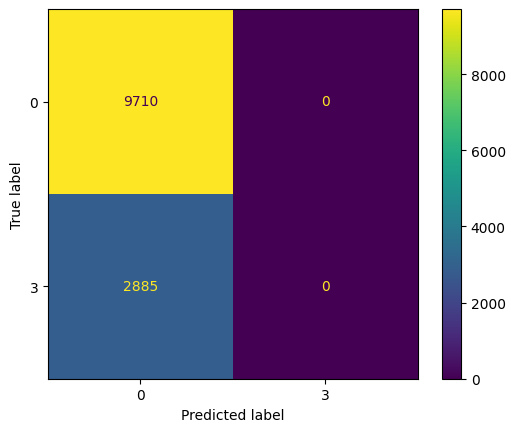

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_R2L_pred=clf1_R2L.predict(X_R2L_test)

confusion_matrix = metrics.confusion_matrix(Y_R2L_test,Y_R2L_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","3"])

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

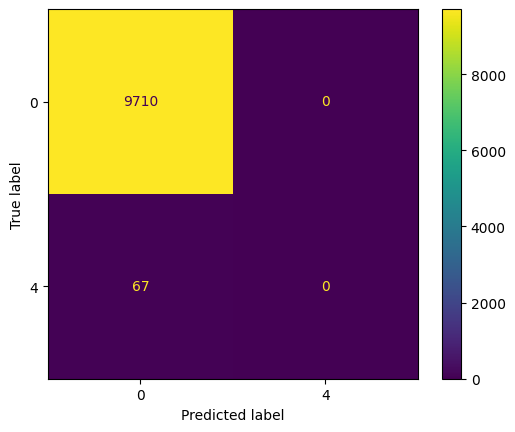

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_U2R_pred=clf1_U2R.predict(X_U2R_test)

confusion_matrix = metrics.confusion_matrix(Y_U2R_test,Y_U2R_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","4"])

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
DoS_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
DoS_Precision.append(precision.mean())
recall = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
DoS_Recall.append(recall.mean())
f = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
DoS_Fmeasure.append(f.mean())

Accuracy: 0.99843 (+/- 0.00221)
Precision: 0.99879 (+/- 0.00280)
Recall: 0.99759 (+/- 0.00356)
F-measure: 0.99819 (+/- 0.00255)


In [ ]:
print(DoS_Accuracy,DoS_Precision,DoS_Recall,DoS_Fmeasure)

[0.8665113570180548, 0.9984274898078043] [0.9883504731752047, 0.9987933813979462] [0.7010723860589814, 0.9975871313672924] [0.820112798189934, 0.9981889521607433]


In [ ]:
accuracy = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
Probe_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
Probe_Precision.append(precision.mean())
recall = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
Probe_Recall.append(recall.mean())
f = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
Probe_Fmeasure.append(f.mean())

Accuracy: 0.99687 (+/- 0.00302)
Precision: 0.99618 (+/- 0.00484)
Recall: 0.99401 (+/- 0.00585)
F-measure: 0.99508 (+/- 0.00475)


In [ ]:
print(Probe_Accuracy,Probe_Precision,Probe_Recall,Probe_Fmeasure)

[0.9775780907277148, 0.9968673391362926] [0.9736193372845667, 0.9961786125662588] [0.9556076460527771, 0.9940110297564864] [0.9641205682578775, 0.9950843292773568]


In [ ]:
accuracy = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
R2L_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
R2L_Precision.append(precision.mean())
recall = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
R2L_Recall.append(recall.mean())
f = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
R2L_Fmeasure.append(f.mean())

Accuracy: 0.98158 (+/- 0.00734)
Precision: 0.97483 (+/- 0.01114)
Recall: 0.97295 (+/- 0.01106)
F-measure: 0.97387 (+/- 0.01042)


In [ ]:
print(R2L_Accuracy,R2L_Precision,R2L_Recall,R2L_Fmeasure)

[0.9360858958356971, 0.9815795478901119] [0.8916307387927846, 0.9748325812778615] [0.9552615211817447, 0.9729487912089978] [0.9167483721444956, 0.9738696394880609]


In [ ]:
accuracy = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
U2R_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
U2R_Precision.append(precision.mean())
recall = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
U2R_Recall.append(recall.mean())
f = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
U2R_Fmeasure.append(f.mean())

Accuracy: 0.99765 (+/- 0.00259)
Precision: 0.95270 (+/- 0.10674)
Recall: 0.87231 (+/- 0.15933)
F-measure: 0.90208 (+/- 0.11280)


In [ ]:
print(U2R_Accuracy,U2R_Precision,U2R_Recall,U2R_Fmeasure)


[0.9725904389925338, 0.9976476338191492] [0.6013206166677997, 0.9526976813864086] [0.9791084301897897, 0.8723100877838263] [0.6606711255015252, 0.90208225653016]


**XGBOOST ALGORITHM**

In [ ]:
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_Probe = le.fit_transform(Y_Probe)
Y_R2L = le.fit_transform(Y_R2L)
Y_U2R = le.fit_transform(Y_U2R)
clf1 = xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf1, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS.astype('int'))
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'srv_serror_rate'), (2, 'src_bytes_SF'), (3, 'rerror_rate'), (4, 'count'), (5, 'dst_host_srv_count'), (6, 'dst_host_serror_rate'), (7, 'service_http'), (8, 'dst_host_same_srv_rate'), (9, 'logged_in'), (10, 'dst_host_srv_serror_rate'), (11, 'dst_host_count'), (12, 'src_bytes_S0'), (13, 'same_srv_rate')]


In [ ]:

rfe.fit(X_newProbe, Y_Probe.astype(int))
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'logged_in'), (2, 'service_eco_i'), (3, 'service_private'), (4, 'dst_host_srv_rerror_rate'), (5, 'dst_host_srv_diff_host_rate'), (6, 'dst_host_srv_count'), (7, 'dst_host_same_src_port_rate'), (8, 'dst_host_rerror_rate'), (9, 'dst_host_diff_srv_rate'), (10, 'Protocol_type_icmp'), (11, 'src_bytes_SF'), (12, 'diff_srv_rate'), (13, 'srv_count')]


In [ ]:
rfe.fit(X_newR2L, Y_R2L.astype(int))

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'service_ftp_data'), (2, 'dst_host_same_src_port_rate'), (3, 'dst_host_srv_diff_host_rate'), (4, 'dst_host_srv_count'), (5, 'hot'), (6, 'flag'), (7, 'is_guest_login'), (8, 'num_failed_logins'), (9, 'dst_bytes'), (10, 'service_http'), (11, 'src_bytes_RSTO'), (12, 'service_imap4'), (13, 'service_ftp')]


In [ ]:
rfe.fit(X_newU2R, Y_U2R.astype(int))

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'root_shell'), (2, 'hot'), (3, 'dst_host_srv_count'), (4, 'dst_host_count'), (5, 'num_shells'), (6, 'service_telnet'), (7, 'num_file_creations'), (8, 'service_ftp_data'), (9, 'service_http'), (10, 'dst_host_same_src_port_rate'), (11, 'dst_host_srv_diff_host_rate'), (12, 'srv_diff_host_rate'), (13, 'urgent')]


In [ ]:
from sklearn.feature_selection import RFE
clf1 = xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
rfe = RFE(estimator=clf1, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [ ]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [ ]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [ ]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['dst_bytes', 'flag', 'num_compromised', 'count', 'same_srv_rate', 'srv_serror_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'service_ecr_i', 'src_bytes_SF']

Features selected for Probe: ['dst_bytes', 'flag', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'Protocol_type_tcp', 'service_eco_i', 'service_finger', 'service_ftp_data', 'service_http', 'service_private']

Features selected for R2L: ['duration', 'flag', 'hot', 'num_failed_logins', 'is_guest_login', 'count', 'serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data']

Features selected for U2R: ['duration', 'dst_bytes', 'flag', 'hot', 'root_shell', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


In [ ]:
clf1_DoS=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_Probe=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_R2L=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_U2R=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_DoS.fit(X_DoS, Y_DoS.astype(int))
clf1_Probe.fit(X_Probe, Y_Probe.astype(int))
clf1_R2L.fit(X_R2L, Y_R2L.astype(int))
clf1_U2R.fit(X_U2R, Y_U2R.astype(int))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# selected features
clf1_rfeDoS=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_rfeProbe=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_rfeR2L=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_rfeU2R=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
clf1_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf1_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf1_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf1_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf1_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf1_DoS.predict_proba(X_DoS_test)[0:10]

array([[0.02338481, 0.9766152 ],
       [0.04052562, 0.9594744 ],
       [0.95866156, 0.04133846],
       [0.9857509 , 0.01424909],
       [0.48324686, 0.51675314],
       [0.73026097, 0.269739  ],
       [0.5600973 , 0.43990272],
       [0.04052562, 0.9594744 ],
       [0.08582878, 0.9141712 ],
       [0.9826227 , 0.01737733]], dtype=float32)

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

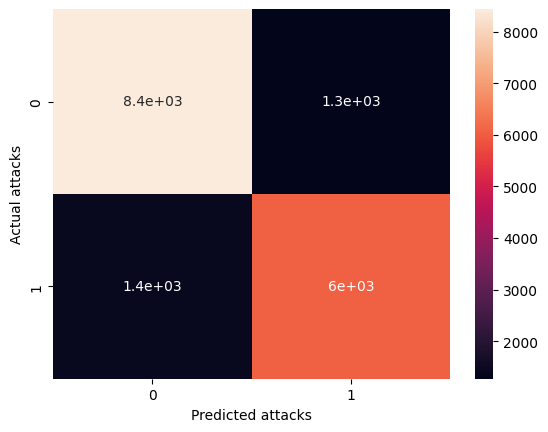

In [ ]:
Y_DoS_pred=clf1_DoS.predict(X_DoS_test)
# Create confusion matrix
cf_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix, annot = True)

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

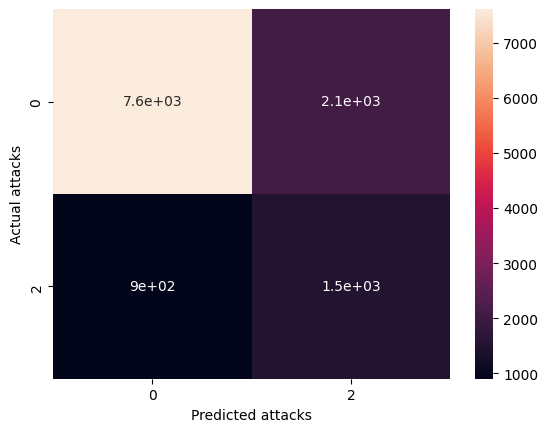

In [ ]:
Y_Probe_pred=clf1_Probe.predict(X_Probe_test)
# Create confusion matrix

cf_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix,xticklabels=['0', '2'],yticklabels=['0', '2'], annot = True)

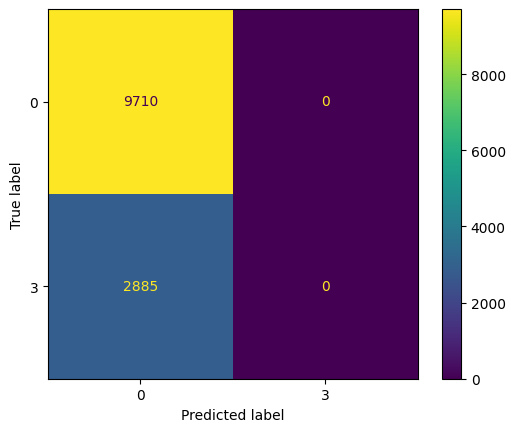

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_R2L_pred=clf1_R2L.predict(X_R2L_test)

confusion_matrix = metrics.confusion_matrix(Y_R2L_test,Y_R2L_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "3"])

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

<Axes: xlabel='Predicted attacks', ylabel='Actual attacks'>

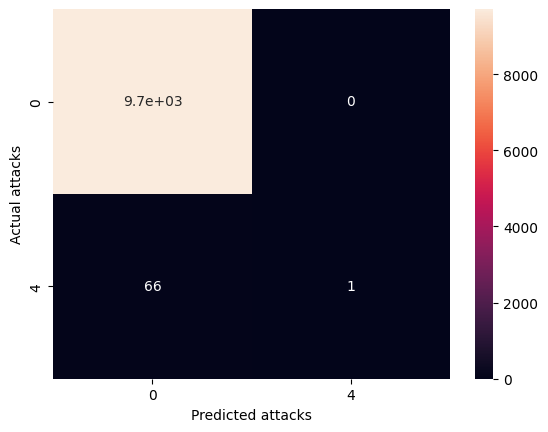

In [ ]:
Y_U2R_pred=clf1_U2R.predict(X_U2R_test)
# Create confusion matrix
cf_matrix = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
sns.heatmap(cf_matrix,xticklabels=['0', '4'],yticklabels=['0', '4'], annot = True)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
DoS_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
DoS_Precision.append(precision.mean())
recall = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
DoS_Recall.append(recall.mean())
f = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
DoS_Fmeasure.append(f.mean())

Accuracy: 0.99505 (+/- 0.00216)
Precision: 0.99265 (+/- 0.00214)
Recall: 0.99598 (+/- 0.00432)
F-measure: 0.99431 (+/- 0.00250)


In [ ]:
print(DoS_Accuracy,DoS_Precision,DoS_Recall,DoS_Fmeasure)

[0.8665113570180548, 0.9984274898078043, 0.9950495049504952] [0.9883504731752047, 0.9987933813979462, 0.9926529136063506] [0.7010723860589814, 0.9975871313672924, 0.9959785522788203] [0.820112798189934, 0.9981889521607433, 0.9943115960882798]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_Probe_test = le.fit_transform(Y_Probe_test)
accuracy = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
Probe_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
Probe_Precision.append(precision.mean())
recall = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
Probe_Recall.append(recall.mean())
f = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
Probe_Fmeasure.append(f.mean())

Accuracy: 0.99308 (+/- 0.00419)
Precision: 0.98772 (+/- 0.00776)
Recall: 0.99071 (+/- 0.00611)
F-measure: 0.98920 (+/- 0.00651)


In [ ]:
print(Probe_Accuracy,Probe_Precision,Probe_Recall,Probe_Fmeasure)

[0.9775780907277148, 0.9968673391362926, 0.9930753601497233] [0.9736193372845667, 0.9961786125662588, 0.9877153937233445] [0.9556076460527771, 0.9940110297564864, 0.9907116281001892] [0.9641205682578775, 0.9950843292773568, 0.98919822607488]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_R2L_test = le.fit_transform(Y_R2L_test)
accuracy = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
R2L_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
R2L_Precision.append(precision.mean())
recall = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
R2L_Recall.append(recall.mean())
f = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
R2L_Fmeasure.append(f.mean())

Accuracy: 0.97213 (+/- 0.00920)
Precision: 0.95218 (+/- 0.01385)
Recall: 0.97169 (+/- 0.01481)
F-measure: 0.96139 (+/- 0.01277)


In [ ]:
print(R2L_Accuracy,R2L_Precision,R2L_Recall,R2L_Fmeasure)

[0.9360858958356971, 0.9815795478901119, 0.9721314472307323] [0.8916307387927846, 0.9748325812778615, 0.9521798612917314] [0.9552615211817447, 0.9729487912089978, 0.9716949868712857] [0.9167483721444956, 0.9738696394880609, 0.9613935288048937]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_U2R_test = le.fit_transform(Y_U2R_test)
accuracy = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
U2R_Accuracy.append(accuracy.mean())
precision = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
U2R_Precision.append(precision.mean())
recall = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
U2R_Recall.append(recall.mean())
f = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
U2R_Fmeasure.append(f.mean())

Accuracy: 0.99683 (+/- 0.00232)
Precision: 0.94764 (+/- 0.12705)
Recall: 0.81279 (+/- 0.13287)
F-measure: 0.86179 (+/- 0.10451)


In [ ]:
print(U2R_Accuracy,U2R_Precision,U2R_Recall,U2R_Fmeasure)

[0.9725904389925338, 0.9976476338191492, 0.996829428595948] [0.6013206166677997, 0.9526976813864086, 0.9476442521438833] [0.9791084301897897, 0.8723100877838263, 0.8127862782600166] [0.6606711255015252, 0.90208225653016, 0.8617850788201442]


**DEEP NEURAL NETWORKS (DNN) ALGORITHM**

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier

In [ ]:
#le = LabelEncoder()
#Y_Probe = le.fit_transform(Y_Probe)
#Y_R2L = le.fit_transform(Y_R2L)
#Y_U2R = le.fit_transform(Y_U2R)
Y_DoS_encoded = to_categorical(Y_DoS, num_classes=4)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def createModel():
    clf1 = keras.Sequential([
        keras.layers.Dense(units=113270, activation='relu', input_shape=[X_DoS.shape[1]]),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=4, activation='softmax')])
    clf1.compile(optimizer=optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])
    return clf1

clf1_DoS = KerasClassifier(model=createModel)
clf1_DoS.fit(X_DoS, Y_DoS_encoded) # fit the model

3540/3540 [==============================] - 1420s 400ms/step - loss: 0.0877 - accuracy: 0.9955


KerasClassifier(
	model=<function createModel at 0x7fa85a5264d0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
Y_U2R_encoded = to_categorical(Y_U2R, num_classes=5)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def createModel():
    clf1 = keras.Sequential([
        keras.layers.Dense(units=113270, activation='relu', input_shape=[X_U2R.shape[1]]),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=5, activation='softmax')])
    clf1.compile(optimizer=optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])
    return clf1

clf1_U2R = KerasClassifier(model=createModel)
clf1_U2R.fit(X_U2R, Y_U2R_encoded) # fit the model

2107/2107 [==============================] - 685s 325ms/step - loss: 0.0235 - accuracy: 0.9986


KerasClassifier(
	model=<function createModel at 0x7fa857abb9a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:

Y_R2L_encoded = to_categorical(Y_R2L, num_classes=5)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def createModel():
    clf1 = keras.Sequential([
        keras.layers.Dense(units=113270, activation='relu', input_shape=[X_R2L.shape[1]]),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=5, activation='softmax')])
    clf1.compile(optimizer=optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])
    return clf1

clf1_R2L = KerasClassifier(model=createModel)
clf1_R2L.fit(X_R2L, Y_R2L_encoded) # fit the model

2136/2136 [==============================] - 685s 320ms/step - loss: 0.0453 - accuracy: 0.9900


KerasClassifier(
	model=<function createModel at 0x7fa85778f010>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
Y_Probe_encoded = to_categorical(Y_Probe, num_classes=4)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def createModel():
    clf1 = keras.Sequential([
        keras.layers.Dense(units=113270, activation='relu', input_shape=[X_Probe.shape[1]]),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=4, activation='softmax')])
    clf1.compile(optimizer=optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])
    return clf1

clf1_Probe = KerasClassifier(model=createModel)
clf1_Probe.fit(X_Probe, Y_Probe_encoded) # fit the model

2469/2469 [==============================] - 792s 319ms/step - loss: 0.0662 - accuracy: 0.9902


KerasClassifier(
	model=<function createModel at 0x7fa85778fbe0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf1_DoS.predict(X_DoS_test)

537/537 [==============================] - 19s 36ms/step


array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf1_DoS.predict_proba(X_DoS_test)[0:10]

537/537 [==============================] - 19s 35ms/step


array([[9.0063741e-06, 9.9999088e-01, 8.5027192e-32, 2.3548717e-29],
       [2.5481077e-05, 9.9997443e-01, 9.3263446e-29, 1.3645657e-26],
       [9.9972749e-01, 2.7255918e-04, 0.0000000e+00, 2.1326042e-18],
       [9.9994713e-01, 5.2780815e-05, 9.3704945e-35, 1.4576213e-13],
       [9.3490356e-01, 6.5096430e-02, 7.2205564e-28, 1.4374055e-10],
       [9.9999982e-01, 9.4475709e-08, 0.0000000e+00, 2.3538934e-16],
       [9.7978055e-01, 2.0219406e-02, 1.8335325e-22, 6.6457302e-09],
       [3.6205853e-05, 9.9996370e-01, 1.1519060e-27, 1.3130527e-25],
       [2.5981127e-13, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 8.6162777e-13, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [ ]:
Y_DoS_test_encoded = to_categorical(Y_DoS_test, num_classes=4)
#Y_R2L_test_encoded = to_categorical(Y_R2L_test, num_classes=4)
Y_Probe_test_encoded = to_categorical(Y_Probe_test, num_classes=4)

537/537 [==============================] - 21s 39ms/step


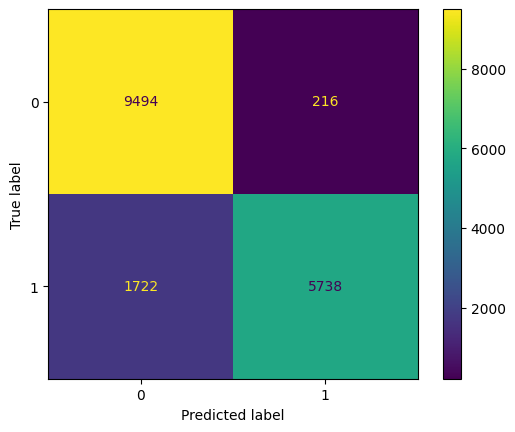

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_DoS_pred=clf1_DoS.predict(X_DoS_test)

confusion_matrix = metrics.confusion_matrix(Y_DoS_test_encoded.argmax(axis=1),Y_DoS_pred.argmax(axis=1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [ ]:
Y_R2L_test_encoded = to_categorical(Y_R2L_test, num_classes=5)

394/394 [==============================] - 15s 37ms/step


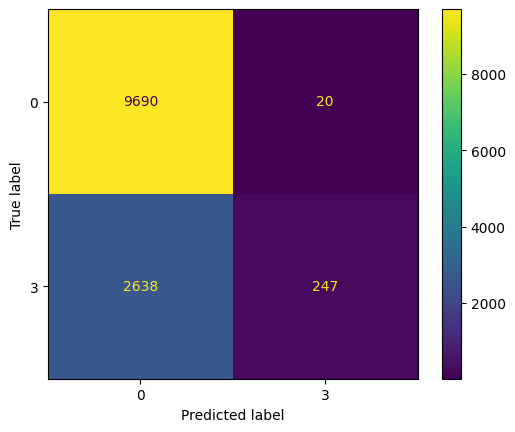

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_R2L_pred=clf1_R2L.predict(X_R2L_test)

confusion_matrix = metrics.confusion_matrix(Y_R2L_test_encoded.argmax(axis=1),Y_R2L_pred.argmax(axis=1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","3"])
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

380/380 [==============================] - 14s 35ms/step


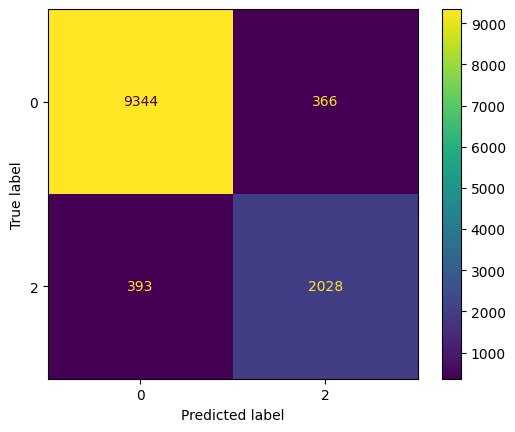

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_Probe_pred=clf1_Probe.predict(X_Probe_test)

confusion_matrix = metrics.confusion_matrix(Y_Probe_test_encoded.argmax(axis=1),Y_Probe_pred.argmax(axis=1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "2"])

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
Y_U2R_test_encoded = to_categorical(Y_U2R_test, num_classes=5)

306/306 [==============================] - 14s 46ms/step


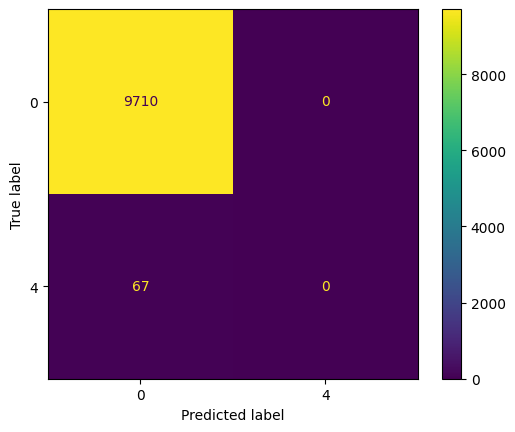

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_U2R_pred=clf1_U2R.predict(X_U2R_test)

confusion_matrix = metrics.confusion_matrix(Y_U2R_test_encoded.argmax(axis=1),Y_U2R_pred.argmax(axis=1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","4"])

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Accuracy: %.5f' % accuracy_score(Y_DoS_test_encoded, Y_DoS_pred))
DoS_Accuracy.append(accuracy_score(Y_DoS_test_encoded, Y_DoS_pred))
print('Precision: %.5f' % precision_score(Y_DoS_test_encoded, Y_DoS_pred,average='samples'))
DoS_Precision.append(precision_score(Y_DoS_test_encoded, Y_DoS_pred,average='samples'))
print('Recall: %.5f' % recall_score(Y_DoS_test_encoded, Y_DoS_pred,average='samples'))
DoS_Recall.append(recall_score(Y_DoS_test_encoded, Y_DoS_pred,average='samples'))
print('F-measure: %.5f' % f1_score(Y_DoS_test_encoded, Y_DoS_pred,average='samples'))
DoS_Fmeasure.append(f1_score(Y_DoS_test_encoded, Y_DoS_pred,average='samples'))


Accuracy: 0.88713
Precision: 0.88713
Recall: 0.88713
F-measure: 0.88713


In [ ]:
print(DoS_Accuracy,DoS_Precision,DoS_Recall,DoS_Fmeasure)

[0.8665113570180548, 0.9984274898078043, 0.9950495049504952, 0.8871287128712871] [0.9883504731752047, 0.9987933813979462, 0.9926529136063506, 0.8871287128712871] [0.7010723860589814, 0.9975871313672924, 0.9959785522788203, 0.8871287128712871] [0.820112798189934, 0.9981889521607433, 0.9943115960882798, 0.8871287128712871]


In [ ]:
print('Accuracy: %.5f' % accuracy_score(Y_U2R_test_encoded, Y_U2R_pred))
U2R_Accuracy.append(accuracy_score(Y_U2R_test_encoded, Y_U2R_pred))
print('Precision: %.5f' % precision_score(Y_U2R_test_encoded, Y_U2R_pred,average='samples'))
U2R_Precision.append(precision_score(Y_U2R_test_encoded, Y_U2R_pred,average='samples'))
print('Recall: %.5f' % recall_score(Y_U2R_test_encoded, Y_U2R_pred,average='samples'))
U2R_Recall.append(recall_score(Y_U2R_test_encoded, Y_U2R_pred,average='samples'))
print('F-measure: %.5f' % f1_score(Y_U2R_test_encoded, Y_U2R_pred,average='samples'))
U2R_Fmeasure.append(f1_score(Y_U2R_test_encoded, Y_U2R_pred,average='samples'))

Accuracy: 0.99315
Precision: 0.99315
Recall: 0.99315
F-measure: 0.99315


In [ ]:
print(Probe_Accuracy,Probe_Precision,Probe_Recall,Probe_Fmeasure)

[0.9775780907277148, 0.9968673391362926, 0.9930753601497233] [0.9736193372845667, 0.9961786125662588, 0.9877153937233445] [0.9556076460527771, 0.9940110297564864, 0.9907116281001892] [0.9641205682578775, 0.9950843292773568, 0.98919822607488]


In [ ]:
print('Accuracy: %.5f' % accuracy_score(Y_R2L_test_encoded, Y_R2L_pred))
R2L_Accuracy.append(accuracy_score(Y_R2L_test_encoded, Y_R2L_pred))
print('Precision: %.5f' % precision_score(Y_R2L_test_encoded, Y_R2L_pred,average='samples'))
R2L_Precision.append(precision_score(Y_R2L_test_encoded, Y_R2L_pred,average='samples'))
print('Recall: %.5f' % recall_score(Y_R2L_test_encoded, Y_R2L_pred,average='samples'))
R2L_Recall.append(recall_score(Y_R2L_test_encoded, Y_R2L_pred,average='samples'))
print('F-measure: %.5f' % f1_score(Y_R2L_test_encoded, Y_R2L_pred,average='samples'))
R2L_Fmeasure.append(f1_score(Y_R2L_test_encoded, Y_R2L_pred,average='samples'))

Accuracy: 0.78896
Precision: 0.78896
Recall: 0.78896
F-measure: 0.78896


In [ ]:
print(R2L_Accuracy,R2L_Precision,R2L_Recall,R2L_Fmeasure)

[0.9360858958356971, 0.9815795478901119, 0.9721314472307323, 0.7889638745533942] [0.8916307387927846, 0.9748325812778615, 0.9521798612917314, 0.7889638745533942] [0.9552615211817447, 0.9729487912089978, 0.9716949868712857, 0.7889638745533942] [0.9167483721444956, 0.9738696394880609, 0.9613935288048937, 0.7889638745533942]


In [ ]:
print('Accuracy: %.5f' % accuracy_score(Y_Probe_test_encoded, Y_Probe_pred))
Probe_Accuracy.append(accuracy_score(Y_Probe_test_encoded, Y_Probe_pred))
print('Precision: %.5f' % precision_score(Y_Probe_test_encoded, Y_Probe_pred,average='samples'))
Probe_Precision.append(precision_score(Y_Probe_test_encoded, Y_Probe_pred,average='samples'))
print('Recall: %.5f' % recall_score(Y_Probe_test_encoded, Y_Probe_pred,average='samples'))
Probe_Recall.append(recall_score(Y_Probe_test_encoded, Y_Probe_pred,average='samples'))
print('F-measure: %.5f' % f1_score(Y_Probe_test_encoded, Y_Probe_pred,average='samples'))
Probe_Fmeasure.append(f1_score(Y_Probe_test_encoded, Y_Probe_pred,average='samples'))

Accuracy: 0.93743
Precision: 0.93743
Recall: 0.93743
F-measure: 0.93743


In [ ]:
print(U2R_Accuracy,U2R_Precision,U2R_Recall,U2R_Fmeasure)

[0.9725904389925338, 0.9976476338191492, 0.996829428595948, 0.9931471821622174] [0.6013206166677997, 0.9526976813864086, 0.9476442521438833, 0.9931471821622174] [0.9791084301897897, 0.8723100877838263, 0.8127862782600166, 0.9931471821622174] [0.6606711255015252, 0.90208225653016, 0.8617850788201442, 0.9931471821622174]


In [ ]:
import numpy as np

array = np.array(DoS_Accuracy)

array = array * 100
DoS_Accuracy_ = array.tolist()
DoS_Accuracy_ = [ '%.2f' % elem for elem in DoS_Accuracy_ ]
DoS_Accuracy_ = np.array(DoS_Accuracy_).astype(np.float)
print(DoS_Accuracy_)


[86.65 99.84 99.5  88.71]


<ipython-input-469-9024dcf8352e>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DoS_Accuracy_ = np.array(DoS_Accuracy_).astype(np.float)


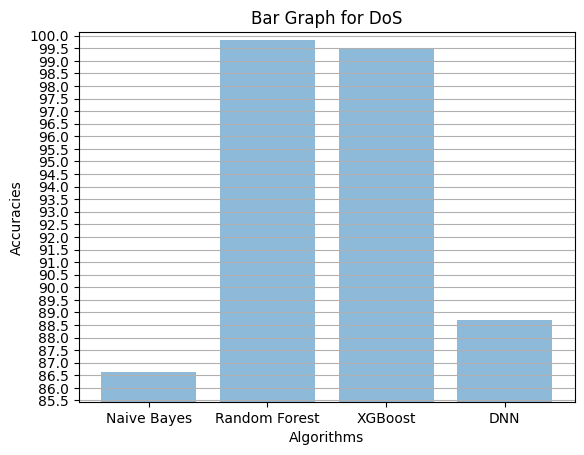

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,DoS_Accuracy_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracies')
ax.set_title('Bar Graph for DoS')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(DoS_Accuracy_)
max_value = max(DoS_Accuracy_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(DoS_Precision)

array = array * 100
DoS_Precision_ = array.tolist()
DoS_Precision_ = [ '%.2f' % elem for elem in DoS_Precision_ ]
DoS_Precision_ = np.array(DoS_Precision_).astype(np.float)
print(DoS_Precision_)


[98.84 99.88 99.27 88.71]


<ipython-input-473-e5328ca55dfe>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DoS_Precision_ = np.array(DoS_Precision_).astype(np.float)


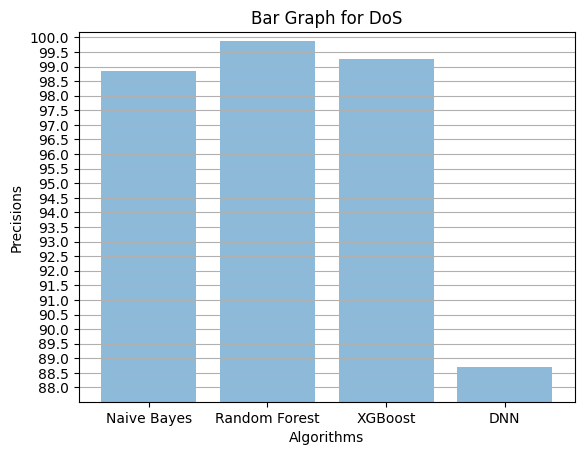

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,DoS_Precision_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Precisions')
ax.set_title('Bar Graph for DoS')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(DoS_Precision_)
max_value = max(DoS_Precision_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(DoS_Recall)

array = array * 100
DoS_Recall_ = array.tolist()
DoS_Recall_ = [ '%.2f' % elem for elem in DoS_Recall_ ]
DoS_Recall_ = np.array(DoS_Recall_).astype(np.float)
print(DoS_Recall_)


[70.11 99.76 99.6  88.71]


<ipython-input-475-468d9bd4a0b9>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DoS_Recall_ = np.array(DoS_Recall_).astype(np.float)


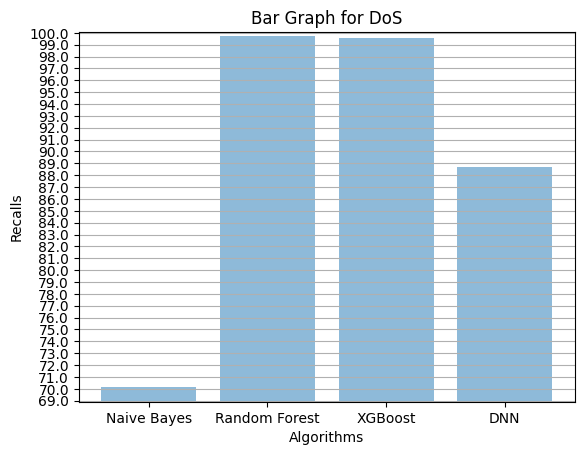

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,DoS_Recall_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Recalls')
ax.set_title('Bar Graph for DoS')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(DoS_Recall_)
max_value = max(DoS_Recall_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(DoS_Fmeasure)

array = array * 100
DoS_Fmeasure_ = array.tolist()
DoS_Fmeasure_ = [ '%.2f' % elem for elem in DoS_Fmeasure_ ]
DoS_Fmeasure_ = np.array(DoS_Fmeasure_).astype(np.float)
print(DoS_Fmeasure_)


[82.01 99.82 99.43 88.71]


<ipython-input-478-3a150d7efe21>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DoS_Fmeasure_ = np.array(DoS_Fmeasure_).astype(np.float)


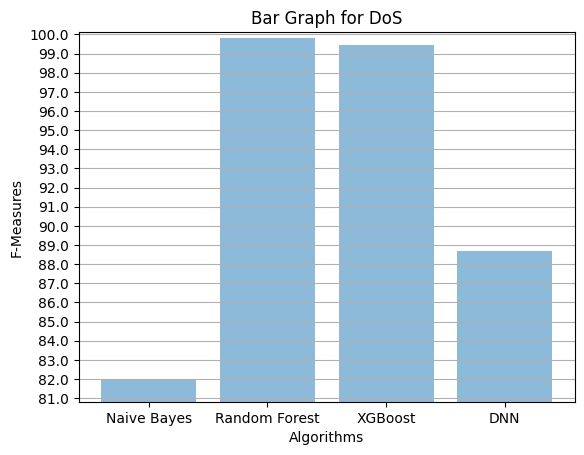

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,DoS_Fmeasure_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('F-Measures')
ax.set_title('Bar Graph for DoS')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(DoS_Fmeasure_)
max_value = max(DoS_Fmeasure_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(U2R_Accuracy)

array = array * 100
U2R_Accuracy_ = array.tolist()
U2R_Accuracy_ = [ '%.2f' % elem for elem in U2R_Accuracy_ ]
U2R_Accuracy_ = np.array(U2R_Accuracy_).astype(np.float)
print(U2R_Accuracy_)


[97.26 99.76 99.68 99.31]


<ipython-input-482-ae7e5a780ba2>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  U2R_Accuracy_ = np.array(U2R_Accuracy_).astype(np.float)


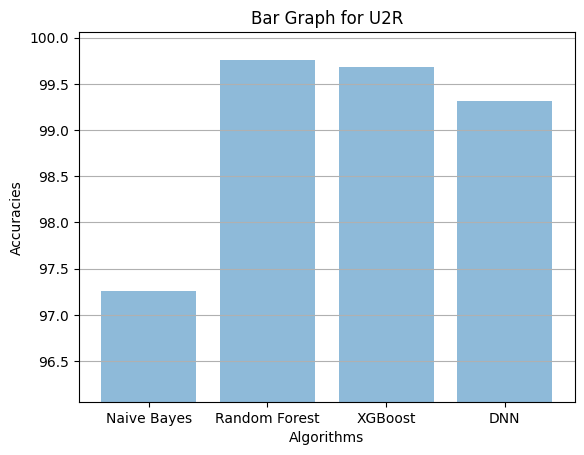

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,U2R_Accuracy_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracies')
ax.set_title('Bar Graph for U2R')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(U2R_Accuracy_)
max_value = max(U2R_Accuracy_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(U2R_Precision)

array = array * 100
U2R_Precision_ = array.tolist()
U2R_Precision_ = [ '%.2f' % elem for elem in U2R_Precision_ ]
U2R_Precision_ = np.array(U2R_Precision_).astype(np.float)
print(U2R_Precision_)


[60.13 95.27 94.76 99.31]


<ipython-input-484-e25315114991>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  U2R_Precision_ = np.array(U2R_Precision_).astype(np.float)


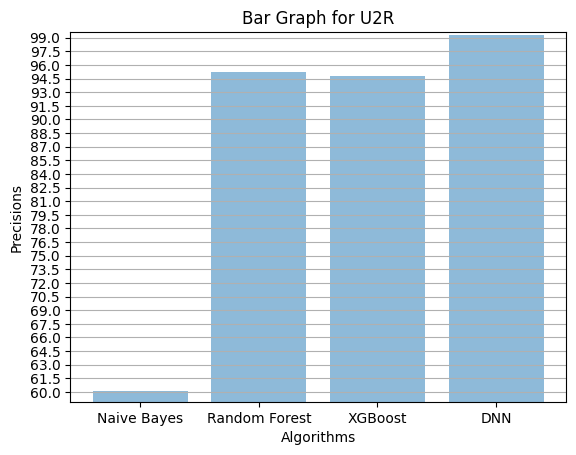

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,U2R_Precision_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Precisions')
ax.set_title('Bar Graph for U2R')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(U2R_Precision_)
max_value = max(U2R_Precision_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(U2R_Recall)

array = array * 100
U2R_Recall_ = array.tolist()
U2R_Recall_ = [ '%.2f' % elem for elem in U2R_Recall_ ]
U2R_Recall_ = np.array(U2R_Recall_).astype(np.float)
print(U2R_Recall_)


[97.91 87.23 81.28 99.31]


<ipython-input-488-d052f2ddbf88>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  U2R_Recall_ = np.array(U2R_Recall_).astype(np.float)


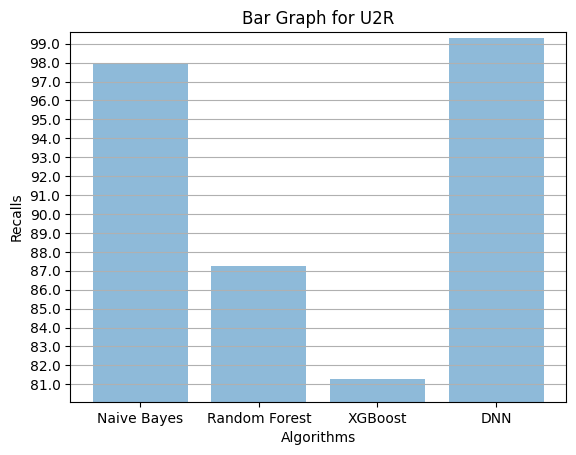

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,U2R_Recall_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Recalls')
ax.set_title('Bar Graph for U2R')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(U2R_Recall_)
max_value = max(U2R_Recall_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(U2R_Fmeasure)

array = array * 100
U2R_Fmeasure_ = array.tolist()
U2R_Fmeasure_ = [ '%.2f' % elem for elem in U2R_Fmeasure_ ]
U2R_Fmeasure_ = np.array(U2R_Fmeasure_).astype(np.float)
print(U2R_Fmeasure_)


[66.07 90.21 86.18 99.31]


<ipython-input-494-4ca45693d5fb>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  U2R_Fmeasure_ = np.array(U2R_Fmeasure_).astype(np.float)


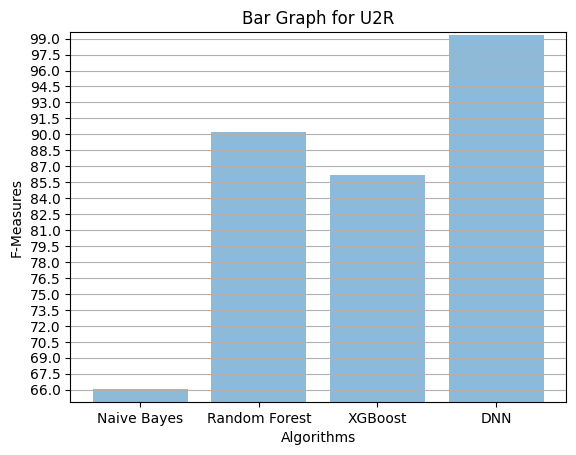

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,U2R_Fmeasure_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('F-Measures')
ax.set_title('Bar Graph for U2R')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(U2R_Fmeasure_)
max_value = max(U2R_Fmeasure_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(R2L_Accuracy)

array = array * 100
R2L_Accuracy_ = array.tolist()
R2L_Accuracy_ = [ '%.2f' % elem for elem in R2L_Accuracy_ ]
R2L_Accuracy_ = np.array(R2L_Accuracy_).astype(np.float)
print(R2L_Accuracy_)


[93.61 98.16 97.21 78.9 ]


<ipython-input-498-687f5f0b4861>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2L_Accuracy_ = np.array(R2L_Accuracy_).astype(np.float)


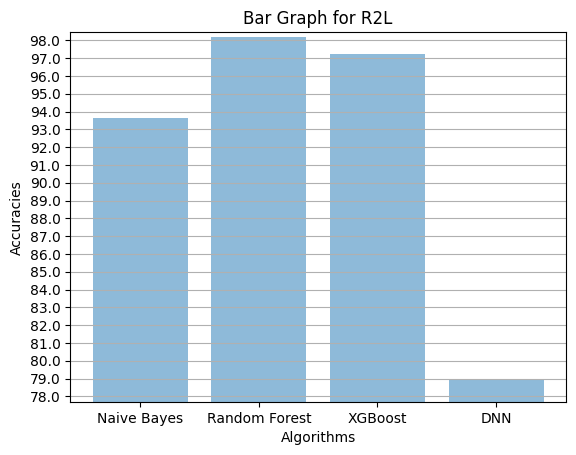

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,R2L_Accuracy_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracies')
ax.set_title('Bar Graph for R2L')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(R2L_Accuracy_)
max_value = max(R2L_Accuracy_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(R2L_Precision)

array = array * 100
R2L_Precision_ = array.tolist()
R2L_Precision_ = [ '%.2f' % elem for elem in R2L_Precision_ ]
R2L_Precision_ = np.array(R2L_Precision_).astype(np.float)
print(R2L_Precision_)


[89.16 97.48 95.22 78.9 ]


<ipython-input-501-b9d8a44751b8>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2L_Precision_ = np.array(R2L_Precision_).astype(np.float)


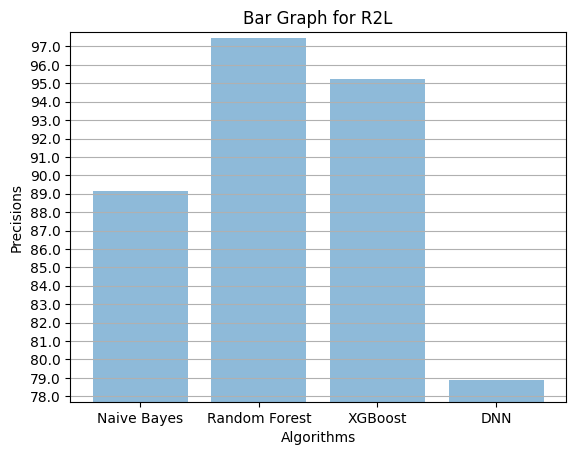

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,R2L_Precision_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Precisions')
ax.set_title('Bar Graph for R2L')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(R2L_Precision_)
max_value = max(R2L_Precision_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(R2L_Recall)

array = array * 100
R2L_Recall_ = array.tolist()
R2L_Recall_ = [ '%.2f' % elem for elem in R2L_Recall_ ]
R2L_Recall_ = np.array(R2L_Recall_).astype(np.float)
print(R2L_Recall_)


[95.53 97.29 97.17 78.9 ]


<ipython-input-504-6521edba5afe>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2L_Recall_ = np.array(R2L_Recall_).astype(np.float)


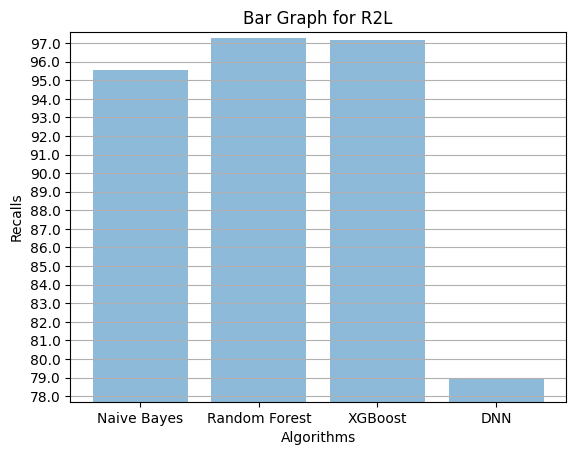

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,R2L_Recall_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Recalls')
ax.set_title('Bar Graph for R2L')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(R2L_Recall_)
max_value = max(R2L_Recall_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(R2L_Fmeasure)

array = array * 100
R2L_Fmeasure_ = array.tolist()
R2L_Fmeasure_ = [ '%.2f' % elem for elem in R2L_Fmeasure_ ]
R2L_Fmeasure_ = np.array(R2L_Fmeasure_).astype(np.float)
print(R2L_Fmeasure_)


[91.67 97.39 96.14 78.9 ]


<ipython-input-506-3db648899016>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2L_Fmeasure_ = np.array(R2L_Fmeasure_).astype(np.float)


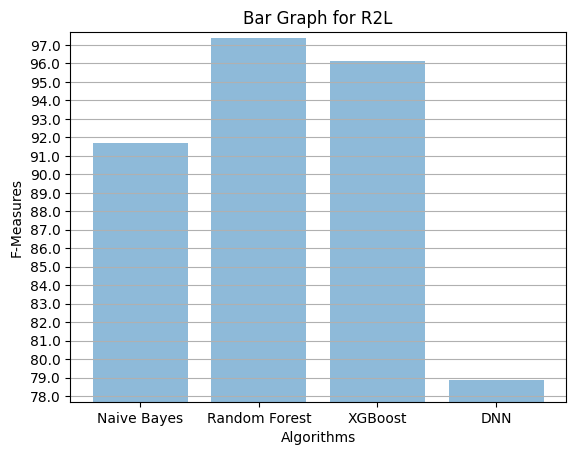

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,R2L_Fmeasure_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('F-Measures')
ax.set_title('Bar Graph for R2L')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(R2L_Fmeasure_)
max_value = max(R2L_Fmeasure_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(Probe_Accuracy)

array = array * 100
Probe_Accuracy_ = array.tolist()
Probe_Accuracy_ = [ '%.2f' % elem for elem in Probe_Accuracy_ ]
Probe_Accuracy_ = np.array(Probe_Accuracy_).astype(np.float)
print(Probe_Accuracy_)


[97.76 99.69 99.31 93.74]


<ipython-input-509-272dd43e959e>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Probe_Accuracy_ = np.array(Probe_Accuracy_).astype(np.float)


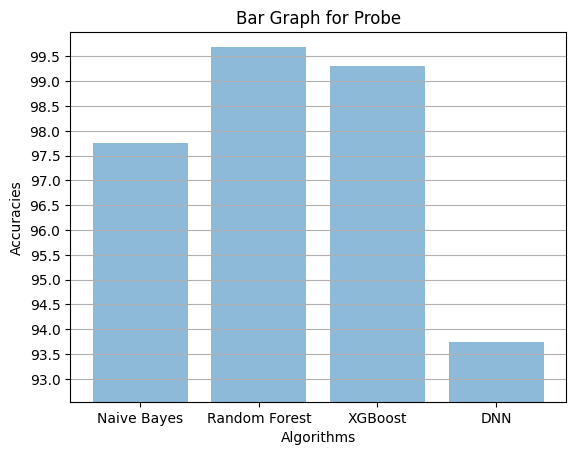

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,Probe_Accuracy_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracies')
ax.set_title('Bar Graph for Probe')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(Probe_Accuracy_)
max_value = max(Probe_Accuracy_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(Probe_Precision)

array = array * 100
Probe_Precision_ = array.tolist()
Probe_Precision_ = [ '%.2f' % elem for elem in Probe_Precision_ ]
Probe_Precision_ = np.array(Probe_Precision_).astype(np.float)
print(Probe_Precision_)


[97.36 99.62 98.77 93.74]


<ipython-input-511-4eba817cb536>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Probe_Precision_ = np.array(Probe_Precision_).astype(np.float)


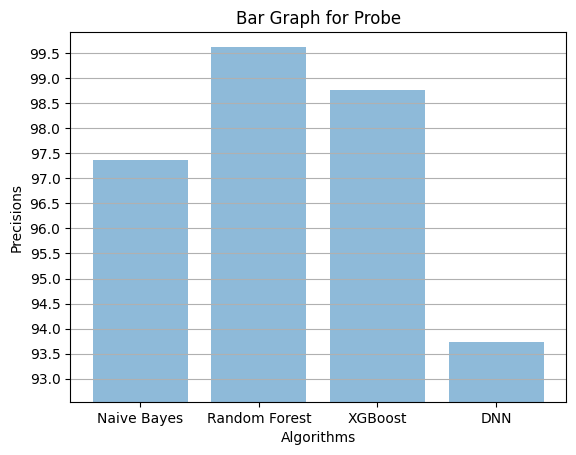

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,Probe_Precision_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Precisions')
ax.set_title('Bar Graph for Probe')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(Probe_Precision_)
max_value = max(Probe_Precision_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(Probe_Recall)

array = array * 100
Probe_Recall_ = array.tolist()
Probe_Recall_ = [ '%.2f' % elem for elem in Probe_Recall_ ]
Probe_Recall_ = np.array(Probe_Recall_).astype(np.float)
print(Probe_Recall_)


[95.56 99.4  99.07 93.74]


<ipython-input-513-71b4cfdac2a8>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Probe_Recall_ = np.array(Probe_Recall_).astype(np.float)


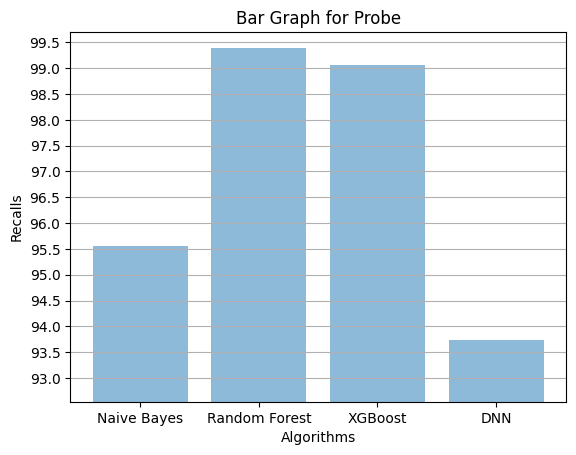

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,Probe_Recall_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Recalls')
ax.set_title('Bar Graph for Probe')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(Probe_Recall_)
max_value = max(Probe_Recall_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()

In [ ]:
import numpy as np

array = np.array(Probe_Fmeasure)

array = array * 100
Probe_Fmeasure_ = array.tolist()
Probe_Fmeasure_ = [ '%.2f' % elem for elem in Probe_Fmeasure_ ]
Probe_Fmeasure_ = np.array(Probe_Fmeasure_).astype(np.float)
print(Probe_Fmeasure_)


[96.41 99.51 98.92 93.74]


<ipython-input-516-e34e397355f8>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Probe_Fmeasure_ = np.array(Probe_Fmeasure_).astype(np.float)


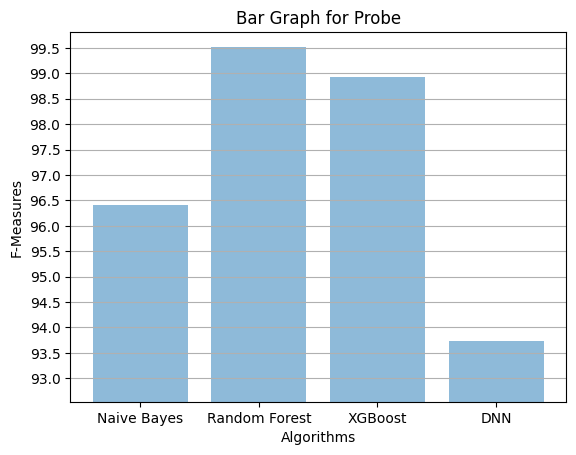

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


labels = ['Naive Bayes', 'Random Forest', 'XGBoost', 'DNN']

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

ax.bar(x_pos,Probe_Fmeasure_, align='center', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('F-Measures')
ax.set_title('Bar Graph for Probe')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Set the y-axis tick labels
min_value = min(Probe_Fmeasure_)
max_value = max(Probe_Fmeasure_)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim([min_value - 1.2, max_value + 0.3])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.yaxis.grid(True)

plt.show()